# 理論

<font color="red">モルフォロジー変換は主に二値画像を対象とし，画像上に写っている図形に対して作用するシンプルな処理</font>のことである.モルフォロジー変換には入力画像と 処理の性質を決める 構造的要素 ( カーネル )の二つを入力とする．<font color="red">基本的なモルフォロジー処理として，収縮(Erosion)と膨張(Dilation)が挙げられる．この他に，この二つの処理を組み合わせたオープニングとクロージングといった処理もある．</font>このチュートリアルでは，これらの処理を一つ一つ紹介していく．

# 1. 収縮(Erosion)

収縮のアイディアは縮む珪藻(ケイソウ)から来ており、前景物体の境界が浸食されていくような処理を指す(常に白色の前景物体を残すようにする)．どうすればこのような処理を実現できるのだろうか？画像に対して(フィルタリング，2D convolutionに使われる)カーネルをスライドさせていきいく．原画像中の(1か0のどちらかの値を持つ)画素は，カーネルの領域に含まれる画素の画素値が全て1であれば1となり，そうでなければ0として出力される．

カーネルのサイズによって物体の境界付近の全画素が白(1)から黒(0)になり，消えてしまう．結果として白い画素(前景物体)が占める領域が収縮するように見えるため、収縮と呼ばれている．この収縮処理は，(色空間のチュートリアルで紹介した)画像中の白色雑音(ノイズ)の除去や、連結している複数の物体を分割する時などに有効である．

ここでは全要素の値が1の5x5サイズのカーネルを例に使う

In [2]:
import numpy as np
import cv2 # OpenCV-Python
import pandas as pd
from pandas import Series
%matplotlib inline
import matplotlib.pyplot as plt


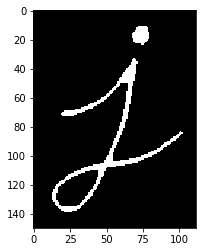

In [6]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(img,kernel,iterations = 1)

plt.plot(), plt.imshow(erosion,cmap="gray")
plt.show()

# 2. 膨張(Dilation)

膨張は収縮の逆の処理である．カーネル内に画素値が ‘1’ の画素が一つでも含まれれば，出力画像の注目画素の画素値を ‘1’ にします．画像中の白色の領域を増やすとも言えるし、前景物体のサイズを増やすとも言える．普通は収縮の後に膨張させるノイズの除去方法で使われる．つまり、前景物体を膨張させるわけである．一度ノイズを消してしまえば，ノイズが再び発生することは無くなり，物体の領域が増える．また、ばらばらのパーツをくっつけたりするのにも便利である

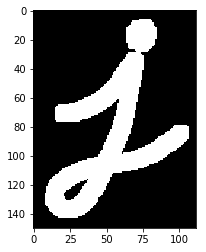

In [7]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((5,5),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)

plt.plot(), plt.imshow(dilation,cmap="gray")
plt.show()

# 3. オープニング(Opening)

オープニング処理は 収縮の後に膨張 をする処理である．前述したようにノイズ除去に有効である．関数は cv2.morphologyEx() を使う 

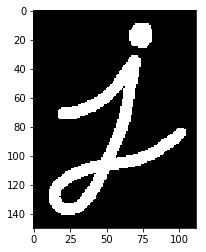

In [8]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((5,5),np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)

plt.plot(), plt.imshow(opening,cmap="gray")
plt.show()

# 4. クロージング(Closing)

クロージング処理はオープニング処理の逆の処理であり， 膨張の後に収縮 をする処理である．前景領域中の小さな(黒い)穴を埋めるのに役立る．オープニングと同様 cv2.morphologyEx() 関数を使うが，第2引数のフラグに cv2.MORPH_CLOSE を指定する点が異なる

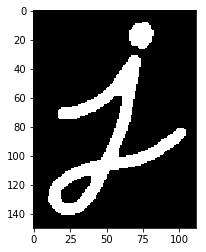

In [9]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((5,5),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

plt.plot(), plt.imshow(closing,cmap="gray")
plt.show()

# 5. モルフォロジー勾配

膨張した画像と収縮した画像の差分をとる処理である

結果として物体の外郭(境界線)が得られる

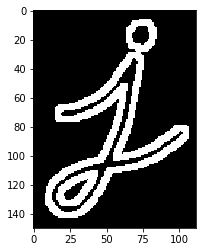

In [10]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((5,5),np.uint8)
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)

plt.plot(), plt.imshow(gradient,cmap="gray")
plt.show()

# 6. トップハット変換

入力画像とオープニング画像の差を取る処理である．次の例では9x9サイズのカーネルを使っている

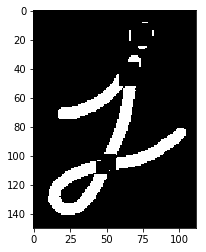

In [12]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((9,9),np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)

plt.plot(), plt.imshow(tophat,cmap="gray")
plt.show()

# 7. ブラックハット変換

入力画像とクロージング画像の差を取る処理である

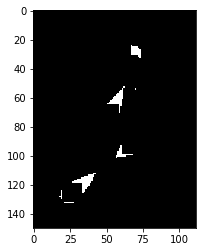

In [13]:
img = cv2.imread('../../img/j.png',0)
kernel = np.ones((9,9),np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.plot(), plt.imshow(blackhat,cmap="gray")
plt.show()

# 構造的要素

前の例ではNumpyを使用して手作業で構造的要素(カーネル)を作成した．作成したカーネルは矩形であったが，時には楕円形や円形カーネルが必要になる時がある．このようなカーネルの作成をする時は cv2.getStructuringElement() 関数を使う．カーネルの形状とサイズを指定するだけで，期待するカーネルを取得できる．

In [14]:
cv2.getStructuringElement(cv2.MORPH_RECT,(5,5))

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [15]:
cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5))

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [16]:
cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

# いろんなカーネルで試す

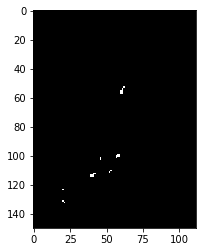

In [19]:
#ブラックハット変換の十字型カーネル
img = cv2.imread('../../img/j.png',0)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.plot(), plt.imshow(blackhat,cmap="gray")
plt.show()

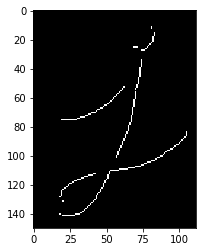

In [20]:
img = cv2.imread('../../img/j.png',0)
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(2,2))
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)

plt.plot(), plt.imshow(blackhat,cmap="gray")
plt.show()

# レシートの文字検出

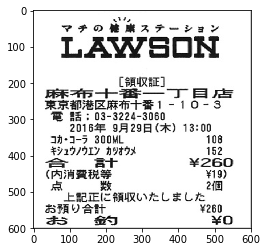

In [5]:
org_img = cv2.imread("../../img/recept.jpg")
imS = cv2.resize(org_img, (600, 600))
plt.plot(), plt.imshow(imS)
plt.show()

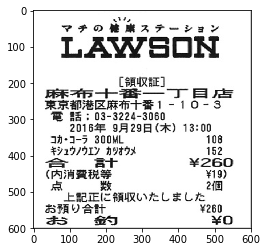

In [7]:
org_gray = cv2.cvtColor(org_img, cv2.COLOR_BGR2GRAY)
imS = cv2.resize(org_gray, (600, 600))
plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()

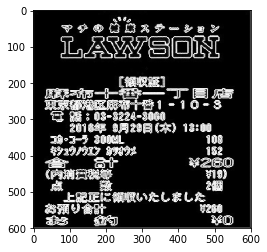

In [8]:
morphStructure = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3)) #3 * 3のカーネル
gradient = cv2.morphologyEx(org_gray, cv2.MORPH_GRADIENT, morphStructure) #モルフォジー勾配
imS = cv2.resize(gradient, (600, 600))
plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()

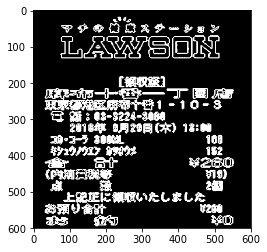

In [9]:
ret2, binary = cv2.threshold(gradient, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imS = cv2.resize(binary, (600, 600))
plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()

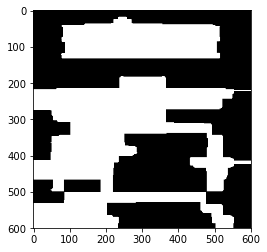

In [10]:
morphStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 15))  #50 * 15のカーネル
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, morphStructure) #クロージング
imS = cv2.resize(closed, (600, 600))
plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()

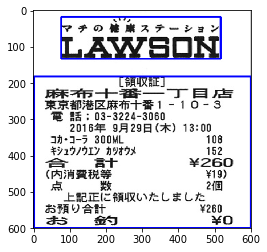

In [11]:
_, contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

rectangle_position = []

for cnt in contours:
    if cv2.contourArea(cnt) > 50:
        [x, y, w, h] = cv2.boundingRect(cnt)

        if h < 10 or w < 10:
            continue

        crop_closed = closed[y:y+h, x:x+w]

        r = cv2.countNonZero(crop_closed)/(w * h)

        if r > 0.45:
            rectangle_position.append((x, y, x + w, y + h, ((y + y + h) / 2)))
            cv2.rectangle(org_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

imS = cv2.resize(org_img, (600, 600))

plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()


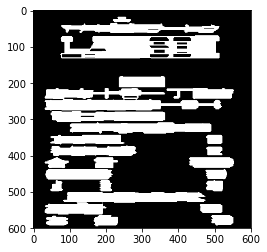

In [13]:
morphStructure = cv2.getStructuringElement(cv2.MORPH_RECT, (15, 1))
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, morphStructure)
imS = cv2.resize(closed, (600, 600))
plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()

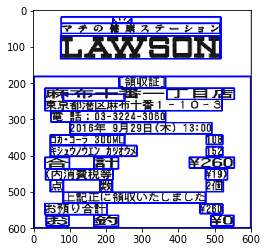

In [14]:
_, contours, hierarchy = cv2.findContours(closed, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

rectangle_position = []

for cnt in contours:
    if cv2.contourArea(cnt) > 50:
        [x, y, w, h] = cv2.boundingRect(cnt)

        if h < 10 or w < 10:
            continue

        crop_closed = closed[y:y+h, x:x+w]

        r = cv2.countNonZero(crop_closed)/(w * h)

        if r > 0.45:
            rectangle_position.append((x, y, x + w, y + h, ((y + y + h) / 2)))
            cv2.rectangle(org_img, (x, y), (x + w, y + h), (0, 0, 255), 2)

imS = cv2.resize(org_img, (600, 600))

plt.plot(), plt.imshow(imS,cmap="gray")
plt.show()
